<a href="https://colab.research.google.com/github/omoknooni/reinforcement_study/blob/main/openai_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install gym
!pip install numpy

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


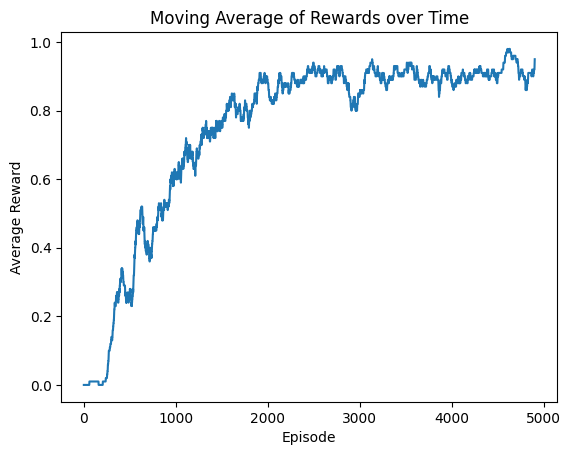

In [2]:
import numpy as np
import torch
import gym
import matplotlib.pyplot as plt

# 환경 초기화
env = gym.make('FrozenLake-v1', is_slippery=False)

# 파라미터 설정
num_episodes = 5000
learning_rate = 0.8
discount_factor = 0.99
exploration_prob = 1.0
exploration_decay = 0.999
min_exploration_prob = 0.1

# Q-table 초기화
Q = torch.zeros([env.observation_space.n, env.action_space.n])

# 보상을 저장할 리스트
rewards = []

# 학습 시작
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for step in range(100):  # 최대 100 스텝까지
        # env.render()  # 환경 렌더링

        # e-greedy 전략으로 행동 선택
        if torch.rand(1).item() < exploration_prob:
            action = env.action_space.sample()
        else:
            action = torch.argmax(Q[state]).item()

        # 선택한 행동으로 환경에서 한 스텝 진행
        new_state, reward, done, _ = env.step(action)

        # Q-table 업데이트
        Q[state, action] = (1 - learning_rate) * Q[state, action] + \
                           learning_rate * (reward + discount_factor * torch.max(Q[new_state]))

        total_reward += reward
        state = new_state

        if done:
            break

    # 탐색 확률 감소
    exploration_prob = max(exploration_prob * exploration_decay, min_exploration_prob)
    rewards.append(total_reward)

# 평균 보상 그래프 그리기
plt.plot(np.convolve(rewards, np.ones(100) / 100, mode='valid'))
plt.title('Moving Average of Rewards over Time')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.show()
